<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# !apt-get -qq install python-cartopy python3-cartopy

In [110]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [111]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [112]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-09-29 15:17:40.466468


In [113]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [114]:
# All States
states = pop['State'].tolist()
states.sort()

In [115]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [116]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [117]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [118]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

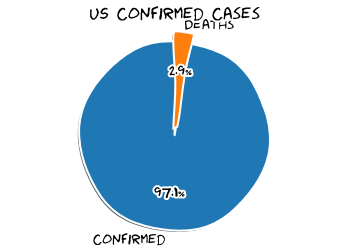

US Population
330362592
US Confirmed
7152221 (2.164960916640344% of population)
US Deaths
204902

New York City Confirmed
243072 (2.915645143704126% of population)
New York City Deaths
23791

Philippines Confirmed
309303
Philippines Deaths
5448



In [119]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

In [120]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
7,New York,US,1601389416000,40.710881,-73.816847,72323,0,7250,65073,Queens,36081,"Queens, New York, US",3208.853442,None,None,84036081,USA
8,New York,US,1601389416000,40.636182,-73.949356,68462,0,7327,61135,Kings,36047,"Kings, New York, US",2674.398210,None,None,84036047,USA
14,New York,US,1601389416000,40.852093,-73.862828,52956,0,4950,48006,Bronx,36005,"Bronx, New York, US",3734.010620,None,None,84036005,USA
17,New York,US,1601389416000,40.740665,-73.589419,46711,0,2201,44510,Nassau,36059,"Nassau, New York, US",3442.418293,None,None,84036059,USA
18,New York,US,1601389416000,40.883201,-72.801217,46428,0,2011,44417,Suffolk,36103,"Suffolk, New York, US",3144.248175,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,New York,US,1601389416000,44.590409,-74.299260,66,0,0,66,Franklin,36033,"Franklin, New York, US",131.941946,None,None,84036033,USA
2805,New York,US,1601389416000,42.635055,-77.103699,64,0,7,57,Yates,36123,"Yates, New York, US",256.893991,None,None,84036123,USA
2883,New York,US,1601389416000,43.784416,-75.449040,50,0,0,50,Lewis,36049,"Lewis, New York, US",190.142988,None,None,84036049,USA
2934,New York,US,1601389416000,42.391840,-76.877330,41,0,0,41,Schuyler,36097,"Schuyler, New York, US",230.246532,None,None,84036097,USA


In [121]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
7,New York,US,1601389416000,40.710881,-73.816847,72323,0,7250,65073,Queens,36081,"Queens, New York, US",3208.853442,None,None,84036081,USA
8,New York,US,1601389416000,40.636182,-73.949356,68462,0,7327,61135,Kings,36047,"Kings, New York, US",2674.398210,None,None,84036047,USA
14,New York,US,1601389416000,40.852093,-73.862828,52956,0,4950,48006,Bronx,36005,"Bronx, New York, US",3734.010620,None,None,84036005,USA
25,New York,US,1601389416000,40.767273,-73.971526,33418,0,3178,30240,New York,36061,"New York, New York, US",2051.812912,None,None,84036061,USA
88,New York,US,1601389416000,40.585822,-74.148086,15913,0,1086,14827,Richmond,36085,"Richmond, New York, US",3342.063204,None,None,84036085,USA


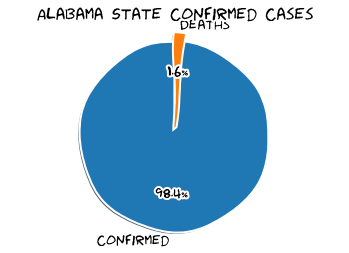

Alabama State Total Population
4887871
Alabama State Confirmed
153554 (3.141531353834829% of population)
Alabama State Deaths
2517 (1.6391627701004208% of confirmed)



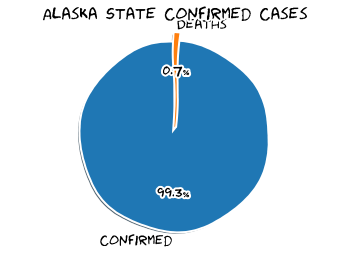

Alaska State Total Population
737438
Alaska State Confirmed
7597 (1.0301883005757773% of population)
Alaska State Deaths
56 (0.7371330788469133% of confirmed)



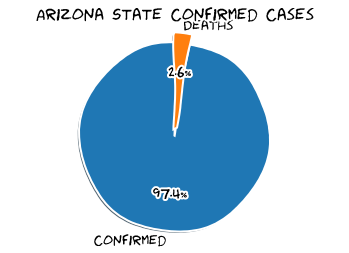

Arizona State Total Population
7171646
Arizona State Confirmed
217510 (3.032916013980612% of population)
Arizona State Deaths
5624 (2.5856282469771505% of confirmed)



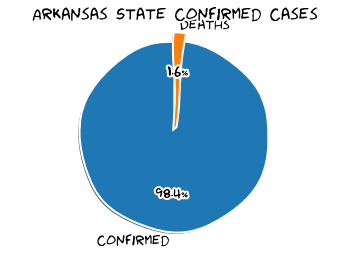

Arkansas State Total Population
3013825
Arkansas State Confirmed
82049 (2.7224208439441573% of population)
Arkansas State Deaths
1329 (1.6197637996806786% of confirmed)



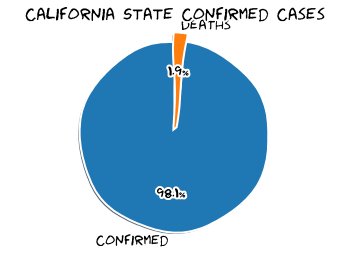

California State Total Population
39557045
California State Confirmed
813320 (2.0560686471904055% of population)
California State Deaths
15641 (1.9231052968081443% of confirmed)



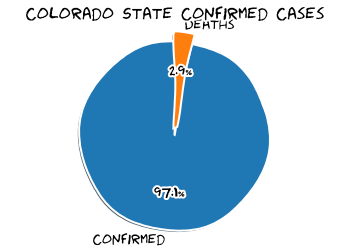

Colorado State Total Population
5695564
Colorado State Confirmed
69469 (1.2197036149536726% of population)
Colorado State Deaths
2044 (2.942319595790928% of confirmed)



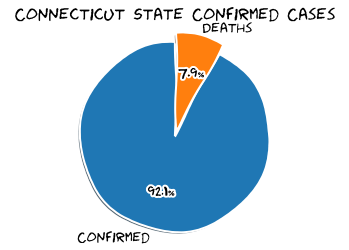

Connecticut State Total Population
3572665
Connecticut State Confirmed
57147 (1.5995622315554354% of population)
Connecticut State Deaths
4503 (7.879678723292562% of confirmed)



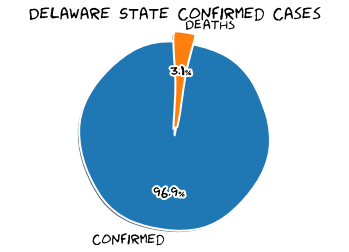

Delaware State Total Population
967171
Delaware State Confirmed
20389 (2.1081070462203684% of population)
Delaware State Deaths
634 (3.109519839128942% of confirmed)



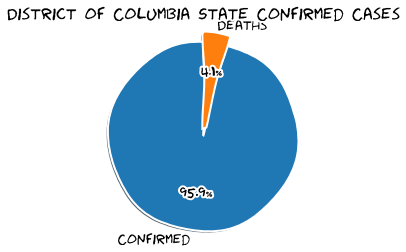

District of Columbia State Total Population
702455
District of Columbia State Confirmed
15300 (2.17807546390872% of population)
District of Columbia State Deaths
626 (4.091503267973856% of confirmed)



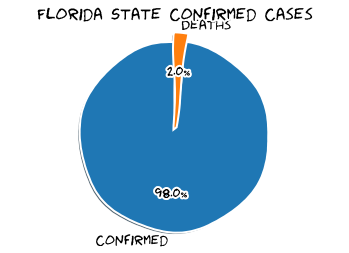

Florida State Total Population
21299325
Florida State Confirmed
701302 (3.292601995603147% of population)
Florida State Deaths
14037 (2.0015628074638316% of confirmed)



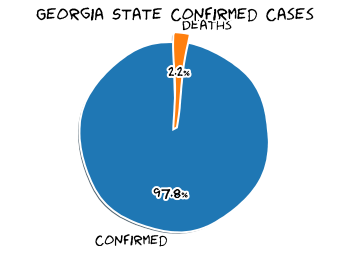

Georgia State Total Population
10519475
Georgia State Confirmed
315281 (2.9971172515738664% of population)
Georgia State Deaths
6961 (2.2078717080953183% of confirmed)



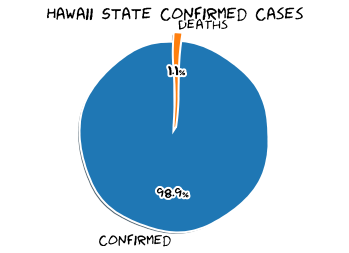

Hawaii State Total Population
1420491
Hawaii State Confirmed
12203 (0.8590691528492613% of population)
Hawaii State Deaths
132 (1.0817012210112267% of confirmed)



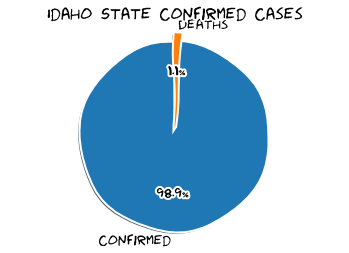

Idaho State Total Population
1754208
Idaho State Confirmed
40923 (2.332847644065014% of population)
Idaho State Deaths
460 (1.124062263274931% of confirmed)



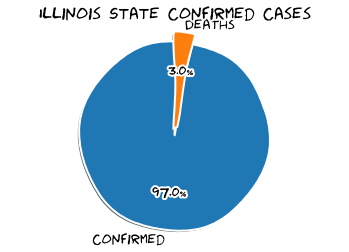

Illinois State Total Population
12741080
Illinois State Confirmed
292082 (2.2924430268077747% of population)
Illinois State Deaths
8858 (3.0327099923993948% of confirmed)



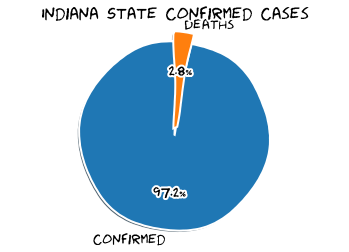

Indiana State Total Population
6691878
Indiana State Confirmed
118322 (1.768143412058618% of population)
Indiana State Deaths
3365 (2.843934348641842% of confirmed)



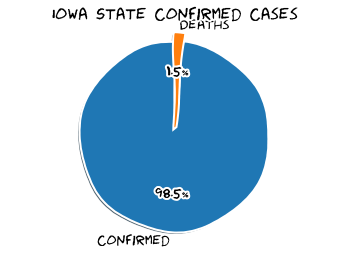

Iowa State Total Population
3156145
Iowa State Confirmed
87489 (2.772020930597295% of population)
Iowa State Deaths
1324 (1.5133331047331664% of confirmed)



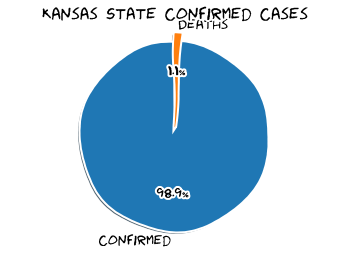

Kansas State Total Population
2911510
Kansas State Confirmed
58071 (1.9945320469447125% of population)
Kansas State Deaths
651 (1.1210414837009868% of confirmed)



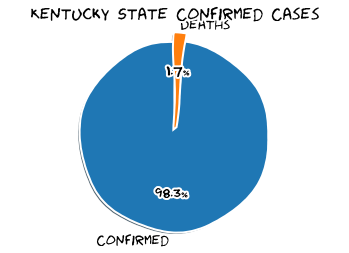

Kentucky State Total Population
4468402
Kentucky State Confirmed
66939 (1.4980523238508978% of population)
Kentucky State Deaths
1162 (1.7359088125009339% of confirmed)



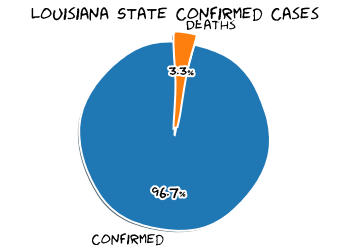

Louisiana State Total Population
4659978
Louisiana State Confirmed
165091 (3.5427420472800515% of population)
Louisiana State Deaths
5480 (3.319381432058683% of confirmed)



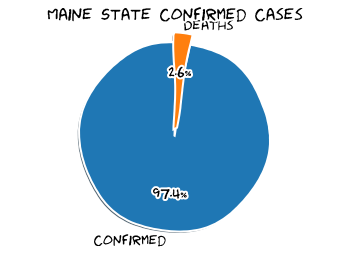

Maine State Total Population
1338404
Maine State Confirmed
5337 (0.3987585213433313% of population)
Maine State Deaths
141 (2.641933670601462% of confirmed)



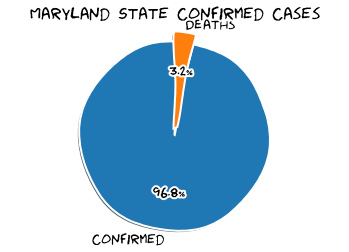

Maryland State Total Population
6042718
Maryland State Confirmed
123880 (2.0500708456029226% of population)
Maryland State Deaths
3932 (3.1740393929609296% of confirmed)



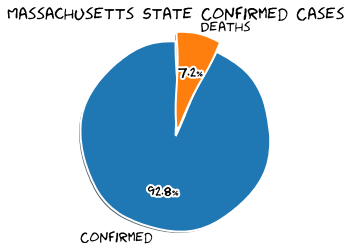

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
131072 (1.8990027598650798% of population)
Massachusetts State Deaths
9415 (7.183074951171875% of confirmed)



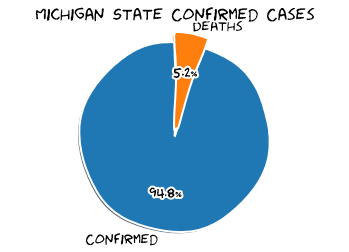

Michigan State Total Population
9995915
Michigan State Confirmed
135702 (1.357574569211523% of population)
Michigan State Deaths
7051 (5.195944053882773% of confirmed)



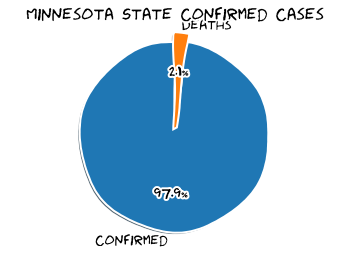

Minnesota State Total Population
5611179
Minnesota State Confirmed
97638 (1.7400621152880706% of population)
Minnesota State Deaths
2067 (2.117003625637559% of confirmed)



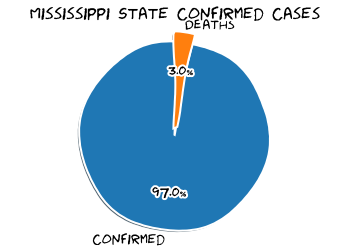

Mississippi State Total Population
2986530
Mississippi State Confirmed
97049 (3.2495571783976724% of population)
Mississippi State Deaths
2921 (3.0098197817597296% of confirmed)



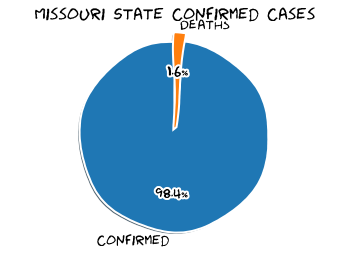

Missouri State Total Population
6126452
Missouri State Confirmed
126483 (2.064539149249843% of population)
Missouri State Deaths
2065 (1.632630472079252% of confirmed)



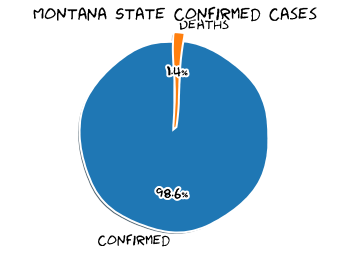

Montana State Total Population
1062305
Montana State Confirmed
12413 (1.1684968064727175% of population)
Montana State Deaths
174 (1.4017562233142673% of confirmed)



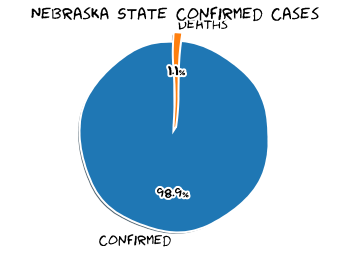

Nebraska State Total Population
1929268
Nebraska State Confirmed
44578 (2.3106172911176674% of population)
Nebraska State Deaths
472 (1.0588182511552784% of confirmed)



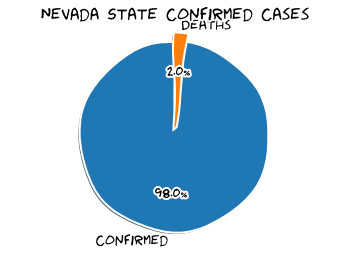

Nevada State Total Population
3034392
Nevada State Confirmed
79191 (2.609781465282007% of population)
Nevada State Deaths
1585 (2.0014900683158436% of confirmed)



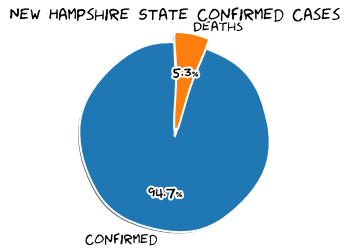

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
8208 (0.6051053552708598% of population)
New Hampshire State Deaths
439 (5.348440545808967% of confirmed)



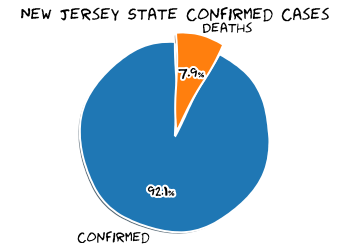

New Jersey State Total Population
8908520
New Jersey State Confirmed
204107 (2.2911437590082304% of population)
New Jersey State Deaths
16107 (7.891449092877756% of confirmed)



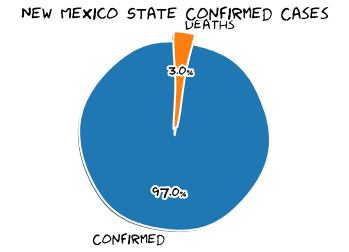

New Mexico State Total Population
2095428
New Mexico State Confirmed
28985 (1.3832496272837815% of population)
New Mexico State Deaths
873 (3.0119027082973955% of confirmed)



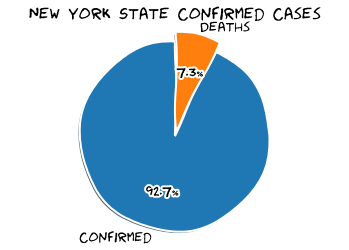

New York State Total Population
19542209
New York State Confirmed
456460 (2.3357646006139836% of population)
New York State Deaths
33121 (7.256057485869517% of confirmed)



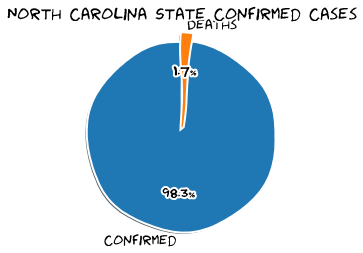

North Carolina State Total Population
10383620
North Carolina State Confirmed
208226 (2.005331473994618% of population)
North Carolina State Deaths
3445 (1.6544523738630141% of confirmed)



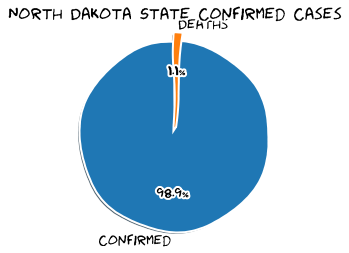

North Dakota State Total Population
760077
North Dakota State Confirmed
21402 (2.8157673498869196% of population)
North Dakota State Deaths
239 (1.1167180637323615% of confirmed)



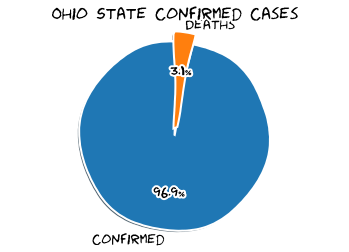

Ohio State Total Population
11689442
Ohio State Confirmed
151802 (1.2986248616486569% of population)
Ohio State Deaths
4746 (3.1264410218574192% of confirmed)



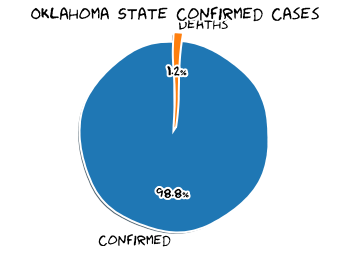

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
85194 (2.16059581864832% of population)
Oklahoma State Deaths
1007 (1.1820081226377444% of confirmed)



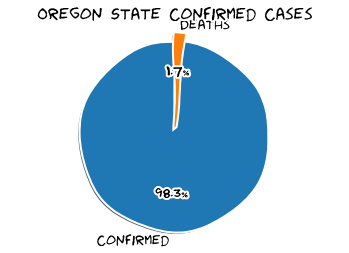

Oregon State Total Population
4190713
Oregon State Confirmed
32994 (0.7873123260886633% of population)
Oregon State Deaths
547 (1.6578771897920834% of confirmed)



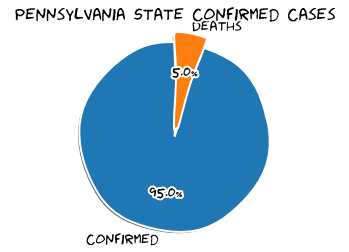

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
161594 (1.261757187051517% of population)
Pennsylvania State Deaths
8088 (5.005136329319158% of confirmed)



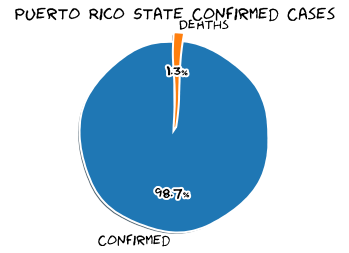

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
48467 (1.5168913663915313% of population)
Puerto Rico State Deaths
654 (1.3493717374708565% of confirmed)



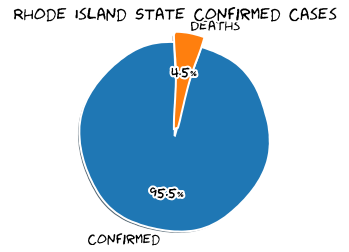

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
24424 (2.3100022226110477% of population)
Rhode Island State Deaths
1110 (4.54471012119227% of confirmed)



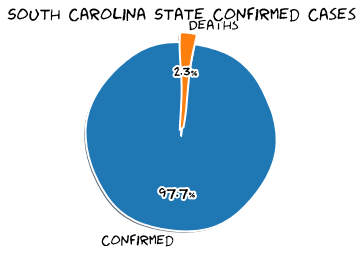

South Carolina State Total Population
5084127
South Carolina State Confirmed
146455 (2.8806322108003988% of population)
South Carolina State Deaths
3337 (2.278515584991977% of confirmed)



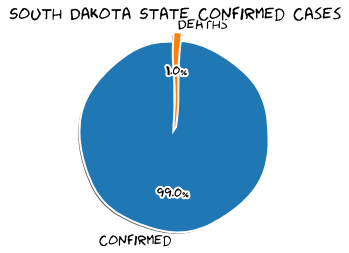

South Dakota State Total Population
882235
South Dakota State Confirmed
21738 (2.4639693505698594% of population)
South Dakota State Deaths
218 (1.002852148311712% of confirmed)



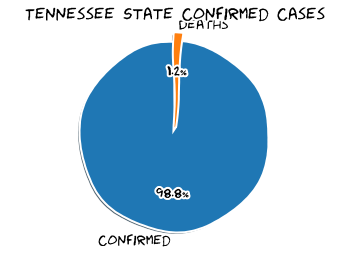

Tennessee State Total Population
6770010
Tennessee State Confirmed
193732 (2.8616205884481705% of population)
Tennessee State Deaths
2389 (1.2331468213821155% of confirmed)



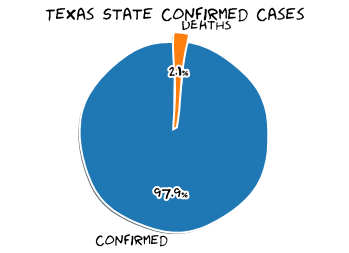

Texas State Total Population
28701845
Texas State Confirmed
761198 (2.652087348391715% of population)
Texas State Deaths
15820 (2.078302885714361% of confirmed)



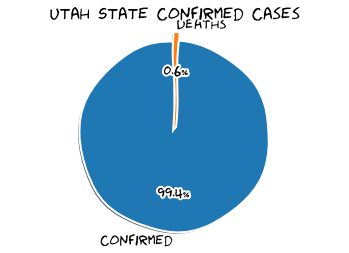

Utah State Total Population
3161105
Utah State Confirmed
71442 (2.2600324886392578% of population)
Utah State Deaths
453 (0.6340807928109515% of confirmed)



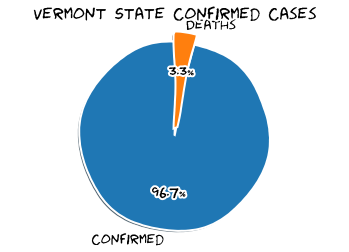

Vermont State Total Population
626299
Vermont State Confirmed
1745 (0.2786209142917361% of population)
Vermont State Deaths
58 (3.32378223495702% of confirmed)



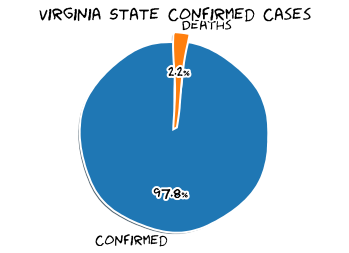

Virginia State Total Population
8517685
Virginia State Confirmed
147345 (1.729871438072669% of population)
Virginia State Deaths
3185 (2.1615935389731584% of confirmed)



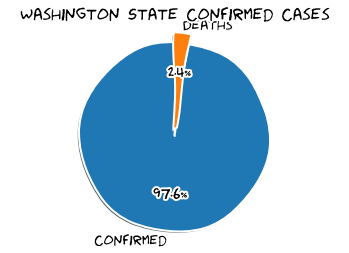

Washington State Total Population
7535591
Washington State Confirmed
86638 (1.1497173877934723% of population)
Washington State Deaths
2100 (2.4238786675592694% of confirmed)



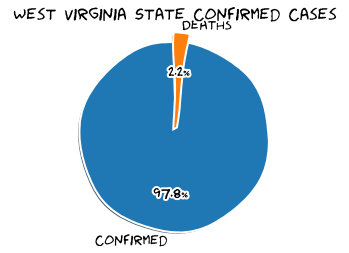

West Virginia State Total Population
1805832
West Virginia State Confirmed
15516 (0.8592161397073482% of population)
West Virginia State Deaths
342 (2.2041763341067284% of confirmed)



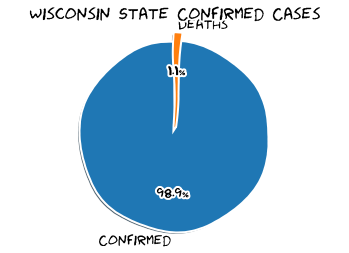

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
117588 (2.0226477096337394% of population)
Wisconsin State Deaths
1283 (1.0910977310609926% of confirmed)



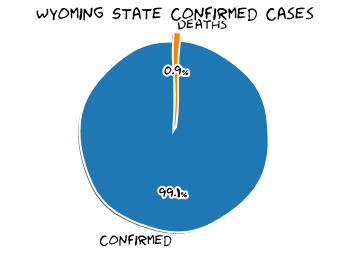

Wyoming State Total Population
577737
Wyoming State Confirmed
5754 (0.9959549068174619% of population)
Wyoming State Deaths
50 (0.8689607229753215% of confirmed)



In [122]:
for i in states:
    state_details(i)

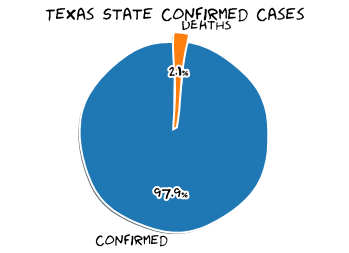

Texas State Total Population
28701845
Texas State Confirmed
761198 (2.652087348391715% of population)
Texas State Deaths
15820 (2.078302885714361% of confirmed)



In [99]:
state_details('Texas')

In [100]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 33423249},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1003008},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-09-29T14:23:36.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 23197023},
 'source': 'https://github.com/mathdroid/covid19'}

In [101]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [102]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-09-29 04:23:42,33.93911,67.709953,39233,1455,32642,5136,Afghanistan,100.7826149077352,3.7086126475161216
1,,,,Albania,2020-09-29 04:23:42,41.1533,20.1683,13391,380,7629,5382,Albania,465.32073111404543,2.8377268314539617
2,,,,Algeria,2020-09-29 04:23:42,28.0339,1.6596,51213,1719,35962,13532,Algeria,116.78855620378289,3.3565696209946694
3,,,,Andorra,2020-09-29 04:23:42,42.5063,1.5218,1966,53,1265,648,Andorra,2544.4897430919564,2.695829094608342
4,,,,Angola,2020-09-29 04:23:42,-11.2027,17.8739,4797,176,1813,2808,Angola,14.595511726491125,3.668959766520742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,,,,West Bank and Gaza,2020-09-29 04:23:42,31.9522,35.2332,39121,299,30220,8602,West Bank and Gaza,766.8655134182353,0.7642953912221058
3951,,,,Western Sahara,2020-09-29 04:23:42,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3952,,,,Yemen,2020-09-29 04:23:42,15.552727,48.516388,2031,587,1266,178,Yemen,6.809502377257295,28.902018709995076
3953,,,,Zambia,2020-09-29 04:23:42,-13.133897,27.849332,14660,332,13821,507,Zambia,79.74344586116284,2.2646657571623465


In [103]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1601389416000,34.308284,-118.228241,268501,0,6515,261986,Los Angeles,06037,"Los Angeles, California, US",2674.550635,None,None,84006037,USA
1,Florida,US,1601389416000,25.611236,-80.551706,169466,0,3228,166238,Miami-Dade,12086,"Miami-Dade, Florida, US",6237.384705,None,None,84012086,USA
2,Illinois,US,1601389416000,41.841448,-87.816588,144315,0,5217,139098,Cook,17031,"Cook, Illinois, US",2802.106235,None,None,84017031,USA
3,Texas,US,1601389416000,29.858649,-95.393395,141707,0,2576,139131,Harris,48201,"Harris, Texas, US",3006.518753,None,None,84048201,USA
4,Arizona,US,1601389416000,33.348359,-112.491815,141377,0,3364,138013,Maricopa,04013,"Maricopa, Arizona, US",3151.927559,None,None,84004013,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,Nebraska,US,1601389416000,41.913117,-99.976778,1,0,0,1,Blaine,31009,"Blaine, Nebraska, US",215.053763,None,None,84031009,USA
3226,Nebraska,US,1601389416000,41.915286,-101.740701,1,0,0,1,Grant,31075,"Grant, Nebraska, US",160.513644,None,None,84031075,USA
3227,Nebraska,US,1601389416000,41.914827,-98.527989,1,0,0,1,Wheeler,31183,"Wheeler, Nebraska, US",127.713921,None,None,84031183,USA
3228,New Mexico,US,1601389416000,34.342745,-104.411784,1,0,0,1,De Baca,35011,"De Baca, New Mexico, US",57.208238,None,None,84035011,USA


In [104]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
7,New York,US,1601389416000,40.710881,-73.816847,72323,0,7250,65073,Queens,36081,"Queens, New York, US",3208.853442,None,None,84036081,USA
8,New York,US,1601389416000,40.636182,-73.949356,68462,0,7327,61135,Kings,36047,"Kings, New York, US",2674.398210,None,None,84036047,USA
14,New York,US,1601389416000,40.852093,-73.862828,52956,0,4950,48006,Bronx,36005,"Bronx, New York, US",3734.010620,None,None,84036005,USA
17,New York,US,1601389416000,40.740665,-73.589419,46711,0,2201,44510,Nassau,36059,"Nassau, New York, US",3442.418293,None,None,84036059,USA
18,New York,US,1601389416000,40.883201,-72.801217,46428,0,2011,44417,Suffolk,36103,"Suffolk, New York, US",3144.248175,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,New York,US,1601389416000,44.590409,-74.299260,66,0,0,66,Franklin,36033,"Franklin, New York, US",131.941946,None,None,84036033,USA
2805,New York,US,1601389416000,42.635055,-77.103699,64,0,7,57,Yates,36123,"Yates, New York, US",256.893991,None,None,84036123,USA
2883,New York,US,1601389416000,43.784416,-75.449040,50,0,0,50,Lewis,36049,"Lewis, New York, US",190.142988,None,None,84036049,USA
2934,New York,US,1601389416000,42.391840,-76.877330,41,0,0,41,Schuyler,36097,"Schuyler, New York, US",230.246532,None,None,84036097,USA


In [105]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

456460

In [106]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [107]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
16,None,Philippines,1601389416000,12.879721,121.774017,309303,252930,5448,50925.0,None,None,Philippines,282.259479,None,None,608,PHL,PH


In [108]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
